# MDI220
# Statistics

# Project

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Ayoub Benabbou

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pi =np.pi

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [3]:
import seaborn as sns


## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**.

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'power_consumption.csv'

In [ ]:
df.head()

In [179]:
regions = list(df.region.unique())

In [180]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [181]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [182]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [183]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

In [184]:
df_region

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11404,Bretagne,2023-05-27,1761
11405,Bretagne,2023-05-28,1610
11406,Bretagne,2023-05-29,1677
11407,Bretagne,2023-05-30,2057


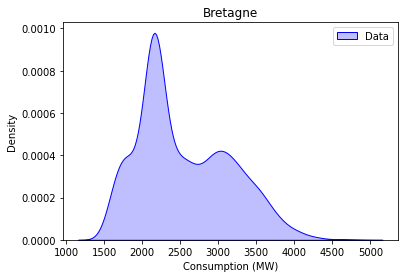

In [185]:
#
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution.

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne.

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:
**Since the xi are iid they have the same mean, therefore:**
$$
\mathbb{E}[\hat \mu]=\frac 1 n \sum_{i=1}^n \mathbb{E}[X_i]=\frac 1 n \sum_{i=1}^n \mu = \mu
$$

**We can also caluclate the expectation of the vraiance:**
$$
\mathbb{E}[\quad\hat{\sigma^2}]= \frac 1 {n-1} \sum_{i=1}^n \mathbb{E}[(x_i - \hat \mu)^2]=\frac 1 {n-1} \sum_{i=1}^n \mathbb{E}[X_i^2 - 2X_i\hat \mu + \hat \mu^2]=\frac 1 {n-1} \sum_{i=1}^n (\sigma^2 + \mu^2 - 2\frac {n-1} {n} \mu^2 -2\frac {\mathbb{E}[X_i^2]} {n}+ \mathbb{V}ar[\hat \mu]+  \mathbb{E}[\hat \mu]^2) = \frac1{n-1}\sum_{i=1}^n(\frac {n\sigma^2 + n\mu^2 - 2n\mu^2+2\mu^2-2\sigma^2-2\mu^2+\sigma^2+n\mu^2}{n})=\frac1{n-1}\sum_{i=1}^n\frac{n-1}{n}\sigma^2 = \sigma^2
$$

2. Give the values obtained for the mean and the standard deviation using these estimators.

**We define functions that calculate the values of these estimators:**

In [186]:
def mean_estim(region):
    df_region = df[df.region == region]
    consump=df_region["consumption"]
    consump_list = consump.tolist()
    mean = 0
    n = len(consump_list)
    for i in range(n):
        mean+=consump_list[i]
    return mean/n
def var_estim(region):
    df_region = df[df.region == region]
    consump=df_region["consumption"]
    consump_list = consump.tolist()
    var = 0
    mean = mean_estim(region)
    n = len(consump_list)
    for i in range(n):
        var+=(consump_list[i]-mean)**2
    return var/(n-1)

def devi_estim(region):
    return np.sqrt(var_estim(region))


In [187]:
region = "Bretagne"

In [188]:
df_region = df[df.region == region]
consump=df_region["consumption"]
print(consump)

7606     2595
7607     3195
7608     3157
7609     3142
7610     2859
         ... 
11404    1761
11405    1610
11406    1677
11407    2057
11408    2106
Name: consumption, Length: 3803, dtype: int64


In [189]:
print("the estimation of the mean is ",mean_estim(region))

the estimation of the mean is  2546.536155666579


In [190]:
print("the estimation of the variance is ",var_estim(region))

the estimation of the variance is  365956.01414481626


In [191]:
print("the estimation of the deviation is ",devi_estim(region))

the estimation of the deviation is  604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [192]:
mean = 2546
std_dev = 605
num_samples = 3803
gen_data = np.random.normal(mean, std_dev, num_samples)



In [193]:
len(gen_data)

3803

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

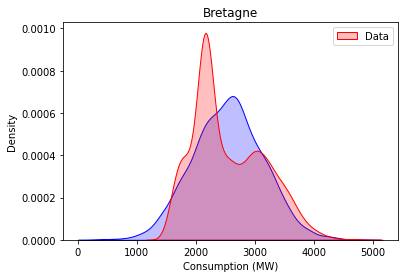

In [194]:
sns.kdeplot(data=gen_data, color='blue', fill=True)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()


5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [195]:
df['date'] = pd.to_datetime(df['date'])
mask = ((df['date'].dt.month == 12) & (df['date'].dt.day >= 22)) | \
       ((df['date'].dt.month==1) | (df['date'].dt.month==2)) | \
       ((df['date'].dt.month == 3) & (df['date'].dt.day <= 21))



winter_data= df_region[mask]







<ipython-input-195-80bbce930cea>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


In [196]:
def winter_mean_estim(region):
    df_region = df[df.region == region]
    winter_data= df_region[mask]
    consump=winter_data["consumption"]
    consump_list = consump.tolist()
    mean = 0
    n = len(consump_list)
    for i in range(n):
        mean+=consump_list[i]
    return mean/n
def winter_var_estim(region):
    df_region = df[df.region == region]
    winter_data= df_region[mask]
    consump=winter_data["consumption"]
    consump_list = consump.tolist()
    var = 0
    mean = winter_mean_estim(region)
    n = len(consump_list)
    for i in range(n):
        var+=(consump_list[i]-mean)**2
    return var/(n-1)
def winter_devi_estim(region):
    return np.sqrt(winter_var_estim(region))



In [197]:
def winter_2023_mean_estim(region):
    df_region = df[df.region == region]
    winter_data= df_region[mask]
    mask_2023 = (winter_data['date'].dt.year == 2023)
    winter_data_2023 =winter_data[mask_2023]
    consump_2023=winter_data_2023["consumption"]
    consump_2023_list = consump_2023.tolist()
    mean = 0
    n = len(consump_2023_list)
    for i in range(n):
        mean+=consump_list[i]
    return mean/n
def winter_2023_var_estim(region):
    df_region = df[df.region == region]
    winter_data= df_region[mask]
    mask_2023 = (winter_data['date'].dt.year == 2023)
    winter_data_2023 =winter_data[mask_2023]
    consump_2023=winter_data_2023["consumption"]
    consump_2023_list = consump_2023.tolist()
    var = 0
    mean = winter_2023_mean_estim(region)
    n = len(consump_2023_list)
    for i in range(n):
        var+=(consump_list[i]-mean)**2
    return var/(n-1)
def winter_2023_devi_estim(region):
    return np.sqrt(winter_2023_var_estim(region))

In [198]:
winter_data

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11333,Bretagne,2023-03-17,2609
11334,Bretagne,2023-03-18,2309
11335,Bretagne,2023-03-19,2206
11336,Bretagne,2023-03-20,2672


In [199]:
print("the estimation of the mean in winter is ",winter_mean_estim(region))

the estimation of the mean in winter is  3214.1782077393077


<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


In [200]:
print("the estimation of the variance in winter is ",winter_var_estim(region))

the estimation of the variance in winter is  167670.9009313411


<ipython-input-196-3fd599348a34>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


In [201]:
mean = winter_mean_estim(region)
std_dev = winter_devi_estim(region)
num_samples = 982
winter_gen_data = np.random.normal(mean, std_dev, num_samples)

<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


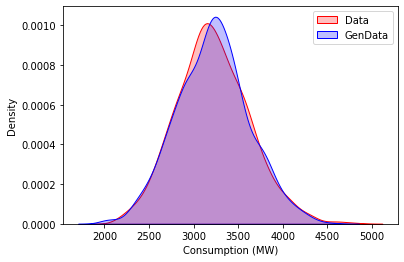

In [202]:
sns.kdeplot(data=winter_data, x="consumption", label="Data", color='red', fill=True)
sns.kdeplot(data=winter_gen_data,label="GenData", color='blue', fill=True)

plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()


6. In which case the Gaussian model seems more appropriate?

**The second curve fits better to a gaussian distribution
The gaussian model is more appropriate in the winter conumption**

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

**Since f and g are pdf, we have $\int f = \int g=1$, so $\int |f - g|<=\int |f| + |g|<=2$ therfore $d(f,g)<=\frac 1 2 2=1$. $d(f,g)$ is clearly positive**



**$d(f,g) = 0 \iff \int |f(x) - g(x)| \mathrm dx=0 \iff |f - g|=0$ a.e $ \iff f=g$ a.e. since $|f - g|$ is poisitive.**


**If we write $A=supp(f)\cap\ supp(g)$ then $\int |f - g|=\int_A |f-g| +\int_{A^C} f + \int_{A^C} g = \int_A |f-g| + 2 - \int_A f - \int_A g  $, if we suppose A is not empty, then since f and g are positive strictly on A, $\int_A |f-g| - \int_A f - \int_A g <0 $ then $d(f,g)=1 \iff \int |f(x) - g(x)| \mathrm dx=2 \iff \int_A |f-g| - \int_A f - \int_A g =0 \iff$ A is empty $\iff$ f and g have disjoint supports**

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [203]:
def dissimilarity(X,X_prim):
    F= gaussian_kde(X)
    G=gaussian_kde(X_prim)
    m=min(min(X),min(X_prim))
    M=max(max(X),max(X_prim))
    x_values = np.arange(m,M,1000)
    
    F_values = F.evaluate(x_values)
    G_values = G.evaluate(x_values)
    difference = np.abs(F_values - G_values)
    d=np.trapz(difference, x_values)/2
    return d
    

In [204]:
region = "Bretagne"
df_region = df[df.region == region]
consump=df_region["consumption"]

print(dissimilarity(list(consump),gen_data))


0.06498561186291772


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [205]:
region = "Bretagne"
df_region = df[df.region == region]
winter_data= df_region[mask]
winter_consump=winter_data["consumption"]
print(dissimilarity(winter_consump,winter_gen_data))


0.051221196929857174


<ipython-input-205-cbcc23eecb5f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


**We notice that the dissimilarity between the winter data and the corresponding gaussian model is less than that between the whole data and the corresponding gaussian model, that means that the winter data corresponds more to a gaussian distribution than the whole data. This confirms our conclusion  in part A.**

4. Do the same for all regions. Give the result as a single dataframe.

In [206]:
diss ={"Region":[],"Dissimilarity Data/Guassian" :[],"Dissimilarity WinterData/Guassian":[]}
diss_df = pd.DataFrame(diss)
for r in regions:
    df_r = df[df.region == r]
    consumption=df_r["consumption"]
    
    r_mean = mean_estim(r)
    r_std_dev = devi_estim(r)
    num_samples = 3803
    r_gen_data = np.random.normal(r_mean, r_std_dev, num_samples)
    d = dissimilarity(consump,r_gen_data)
    
    r_winter_data= df_region[mask]
    
    r_winter_consump=r_winter_data["consumption"]

    r_winter_mean = winter_mean_estim(r)
    r_winter_std_dev = winter_devi_estim(r)
    num_samples = 982
    r_winter_gen_data = np.random.normal(mean, std_dev, num_samples)
 

    wd = dissimilarity(r_winter_consump,r_winter_gen_data)
    
    new_row = {"Region": r,"Dissimilarity Data/Guassian" : d ,"Dissimilarity WinterData/Guassian": wd}
    diss_df = pd.concat([diss_df, pd.DataFrame([new_row])], ignore_index=True)
    
    
    

<ipython-input-206-dbf7bd6b2666>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r_winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-206-dbf7bd6b2666>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r_winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_regi

In [207]:
diss_df

,Region,Dissimilarity Data/Guassian,Dissimilarity WinterData/Guassian
0,Auvergne-Rhône-Alpes,0.849030,0.014880
1,Bourgogne-Franche-Comté,0.206326,0.058533
2,Bretagne,0.111224,0.056117
3,Centre-Val de Loire,0.258150,0.032838
4,Grand Est,0.728312,0.011689
5,Hauts-de-France,0.802526,0.035040
6,Normandie,0.376363,0.026107
7,Nouvelle-Aquitaine,0.702912,0.008178
8,Occitanie,0.902090,0.033473
9,Pays de la Loire,0.292735,0.031238


5. Which region is best fitted by a Gaussian model in winter?

**It is the region correponding to the least dissimilarity, that is the region Pays de la Loire**

6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

<ipython-input-208-7a009fd5a69f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_loire= df_loire[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


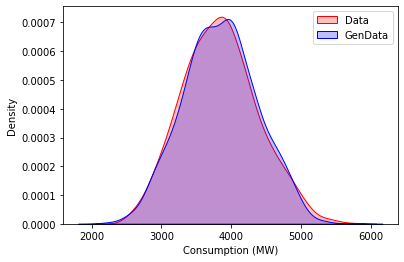

In [208]:
df_loire = df[df.region == "Pays de la Loire"]
winter_loire= df_loire[mask]
winter_consump_loire=winter_loire["consumption"]
mean_loire = winter_mean_estim("Pays de la Loire")
std_dev_loire = winter_devi_estim("Pays de la Loire")
num_samples = 982
winter_gen_loire = np.random.normal(mean_loire, std_dev_loire, num_samples)
sns.kdeplot(data=winter_loire, x="consumption", label="Data", color='red', fill=True)
sns.kdeplot(data=winter_gen_loire,label="GenData", color='blue', fill=True)

plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()


## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW.

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

**$\pi(\mu|x)=p(x|\mu) \pi(\mu) $**

**$\mu$~$N (\mu_0,\sigma_0)$**

**$X_i|\mu$~$N (\mu,\sigma)$ and $X_i$ are $i.i.d$ for $i$ in {1,...,n}**

$$
p(x | \mu) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{\sum (x_i - \mu)^2}{2\sigma^2}\right)
$$

$$
\pi(\mu) = \frac{1}{\sqrt{2\pi\sigma_0^2}} \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)
$$ 
**We find that the product of the two distribution makes another gaussian disribution with parameters:**

**Mean:**
$$
\mu_{\text{posterior}} = \frac{\sigma^2}{\sigma^2 + n\sigma_0^2} \mu_0 + \frac{\sigma_0^2}{\sigma^2 + n\sigma_0^2} \bar{x}
$$
**Where:**
$$
\bar{x} =  \sum_{i=1}^{n} x_i
$$
**And variance:**
$$
\sigma_{\text{posterior}}^2 = \frac{1}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}
$$



2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [209]:
winter_data

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11333,Bretagne,2023-03-17,2609
11334,Bretagne,2023-03-18,2309
11335,Bretagne,2023-03-19,2206
11336,Bretagne,2023-03-20,2672


In [210]:
parameters ={"Year":[],"PostMean" :[],"StdDev":[]}
param_df = pd.DataFrame(parameters)
winter_data['date'] = pd.to_datetime(winter_data['date'])
sigma = 400
sigma_0 = 500
mu_0 = 3500


winter_data= df_region[mask]
for i in range(2013,2024):
    
    mask_i = (winter_data['date'].dt.year == i)
    winter_data_i =winter_data[mask_i]
    consump_i=winter_data_i["consumption"]
    consump_i_list = consump_i.tolist()
    n=len(consump_i_list)
    x_bar =  0
    for x in consump_i_list:
        x_bar+=x
    mu_post = ((sigma**2)*mu_0 + (sigma_0**2)*x_bar)/(sigma**2+n*sigma_0**2)
    sigma_post = np.sqrt(1/(n/sigma**2 + 1/sigma_0**2))
    new_row = {"Year": i,"PostMean" : mu_post ,"StdDev": sigma_post}
    param_df = pd.concat([param_df, pd.DataFrame([new_row])], ignore_index=True)
        
        
        

    
            
               
    

<ipython-input-210-ffc4222fa94c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['date'] = pd.to_datetime(winter_data['date'])
<ipython-input-210-ffc4222fa94c>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


In [211]:
param_df

,Year,PostMean,StdDev
0,2013.0,3343.413504,42.014582
1,2014.0,3118.424537,42.014582
2,2015.0,3167.398500,42.014582
3,2016.0,3207.507639,41.784716
4,2017.0,3251.224625,42.014582
5,2018.0,3315.081642,42.014582
6,2019.0,3195.200794,42.014582
7,2020.0,3145.504147,41.784716
8,2021.0,3341.946161,42.014582
9,2022.0,3165.081642,42.014582


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

In [212]:
winter_data

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11333,Bretagne,2023-03-17,2609
11334,Bretagne,2023-03-18,2309
11335,Bretagne,2023-03-19,2206
11336,Bretagne,2023-03-20,2672


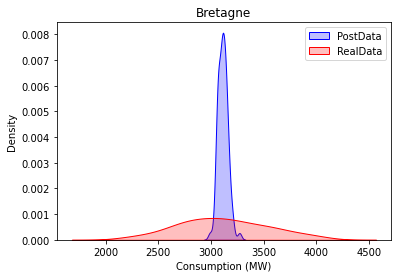

In [213]:
mask_2023 = (winter_data['date'].dt.year == 2023)
winter_data_2023 =winter_data[mask_2023]
consump_2023=winter_data_2023["consumption"]
consump_2023_list = consump_2023.tolist()
post_gen_data = np.random.normal(3117.547123, 44.543540, len(consump_2023_list))
sns.kdeplot(data=post_gen_data, label="PostData", color='blue', fill=True)
sns.kdeplot(data=winter_data_2023, x="consumption", label="RealData", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

4. Discuss the results, comparing to those obtained in part A.

Your answer:

**the posterior distribution represents the distribution of the mean, the mean does not differ a lot from the center value, which explains the low variance and the pointy shape of the curve.**

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

**We have two hypothesis, the first one the one we want to test, the default hypothesis**

$H_0$ = {$\sigma = \sigma_0 = $= 500MW}

**We choose as an alternative the following**

$H_1$ = {$\sigma = \sigma_1$ =400MW}

**we  caluculate now the likelihood ratio:**

**ratio** = $\frac {p_1(x)}{p_0(x)} \alpha \frac{\exp\left(-\frac{ \sum(x_i - \mu)^2}{2\sigma_1^2}\right)} {\exp\left(-\frac{\sum (x_i - \mu)^2}{2\sigma_0^2}\right)} \alpha \exp\left(-\sum (x_i - \mu)^2(\frac{1}{2\sigma_1^2} - \frac{1}{2\sigma_0^2})\right)$

**we denote** $S = \sum(x_i - \mu)^2 $

**comme $\sigma_0>\sigma_1$ then ratio is a decreasing function of S**

the statistical test at level $\alpha$ is $\delta(x) = 1_{S<c}$ for some constant c

we have S~$\sigma^2$ Z 

where Z~$\chi^2(n)$

$\alpha = P_0(S<c) = P_0(\sigma^2Z<c)=P_0(Z<\frac{c}{\sigma^2})$

so $\frac{c}{\sigma_0^2}= Q(\alpha)$ where $Q$ is the quantile function of the $χ2(n)$

therefor $c= \sigma_0^2Q(\alpha)$

2. Provide the result of this test for $\alpha=1\%$.

In [214]:
S = 0
sigma_0=500
mu = 3200
for x in consump_2023_list:
    S+= (x-mu)**2
    


n = len(consump_2023_list)
c1 = chi2.ppf(0.01, n)*sigma_0**2

def test(S):
    if S<c1:return 1
    else: return 0
print(test(S))


0


**The null hypothesis was accepted, we decide then that standard deviation is equal 500MW.**

## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter.

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

In [215]:
winter_data_bret= winter_data
winter_data_prov = df[df.region == "Provence-Alpes-Côte d'Azur"][mask]

<ipython-input-215-0df0ebb68ace>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data_prov = df[df.region == "Provence-Alpes-Côte d'Azur"][mask]


In [216]:
winter_data_prov

,region,date,consumption
38030,Provence-Alpes-Côte d'Azur,2013-01-01,5369
38031,Provence-Alpes-Côte d'Azur,2013-01-02,5834
38032,Provence-Alpes-Côte d'Azur,2013-01-03,5948
38033,Provence-Alpes-Côte d'Azur,2013-01-04,5974
38034,Provence-Alpes-Côte d'Azur,2013-01-05,5580
...,...,...,...
41757,Provence-Alpes-Côte d'Azur,2023-03-17,4442
41758,Provence-Alpes-Côte d'Azur,2023-03-18,4258
41759,Provence-Alpes-Côte d'Azur,2023-03-19,4116
41760,Provence-Alpes-Côte d'Azur,2023-03-20,4257


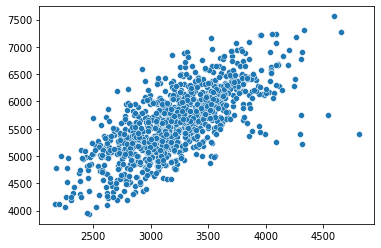

In [217]:
consump_bret=winter_data_bret["consumption"]
consump_bret_list = consump_bret.tolist()
consump_prov = winter_data_prov["consumption"]
consump_prov_list = consump_prov.tolist()
sns.scatterplot(x=consump_bret_list, y=consump_prov_list)
plt.show()


2. Do you think the power consumption in these two regions is independent?

Your answer:

**The power consumption in these two regions is not independent, because the joint distributin is localised in a limited area on the plot**

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$.

Your answer:

**We denote by $X$ (resp. $Y$) the variable that represents the power consumption in Bretagne (resp. Provence-Alpes-Côte d'Azur)**

**null hypothesis $H_0 =$ {$X$ and $Y$ are inedependent}**

**alternative hypothesis $H_1 = $ {$X$ and $Y$ are not independent}**

**We denote by $N_x$ (resp. $N_y$) the number of distinct values taken by the variable $X$ (resp. $Y$)**

**the joint variable (X,Y) can take the values $(x_i,y_j)$ for $i$ in ${1,...,N_x}$ and $j$ in ${1,...N_y}$**

**and We denote $N_{x_i,y_j}$ by $N_{ij}$**

**$T(X,Y)=\sum_{i = 1,..N_x}\sum_{j=1,..N_y} \frac {(N_{ij}-\frac{N_iN_j}{n})^2}{\frac{N_iN_j}{n}}$**

**the chi-2 test at level $\alpha$ is $\delta(x,y) = 1_{T(x,y)>c}$**

**$c= Q(1-\alpha)$ where $Q$ is the quantile function of the $χ2((N_x−1)(N_y−1))$**



4. Give the result of this test for $\alpha=1\%$.

In [218]:
bret_values = consump_bret.value_counts()
prov_values = consump_prov.value_counts()
prov_values_list = prov_values.tolist()
bret_values_list = bret_values.tolist()
Nx = len(bret_values_list)
Ny = len(prov_values_list)
n = len(consump_bret_list)
T=0
for i in range(Nx):
    for j in range(Ny):
        T+= (bret_values_list[i]*prov_values_list[j]-bret_values_list[i]*prov_values_list[j]/n)/(bret_values_list[i]*prov_values_list[j]/n)


In [219]:
alpha2 = 0.95
c2= chi2.ppf(1-0.95, (Nx-1)*(Ny-1))
def chi2_test(T):
    if T>c2: return 1
    else: return 0
print(chi2_test(T))
 

1


**The null hypothesis is refuted, and the test concludes that X and Y are not independent**

## F. Confidence intervals

Consider the region Bretagne in winter.

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption.

**we use the pivot function$\phi_{\theta}(x)=\frac{\sqrt(n)}{\hat\sigma}(\bar x-\theta)$ where $\theta$ is the parameter representing the mean and $\bar{x} = \frac 1 n \sum_{i=1}^{n} x_i$ an $\hat\sigma$ is the estimator of the standard deviation**

**if we take $Z =\phi_{\theta}(X)$ and c that verifies $P(Z\in [-c,c])=\alpha$**

**then the confidence interbal is defined as $\delta(x) = [\bar{x}-\frac{c\hat\sigma}{\sqrt n},\bar{x}+\frac{c\hat\sigma}{\sqrt n}]$**

**that c can be found as $c = Q(\frac{1+\alpha}2)$ where Q is the quantile of the student distribution of n-1 degrees of freedom**

In [220]:
region = "Bretagne"
alph = 0.95
sigma_hat = winter_devi_estim(region)
x_bar = winter_mean_estim(region)
df_region = df[df.region == region]
winter_data= df_region[mask]
consump=winter_data["consumption"]
consump_list = consump.tolist()
n=len(consump_list)
c = t.ppf((1+alph)/2, n-1)
m = x_bar - c*sigma_hat/np.sqrt(n)
M = x_bar + c*sigma_hat/np.sqrt(n)
print("the lower bound of the confidence interval is ",m)
print("the upper bound of the confidence interval is ",M)


the lower bound of the confidence interval is  3188.5358856463263
the upper bound of the confidence interval is  3239.820529832289


<ipython-input-196-3fd599348a34>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-196-3fd599348a34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-220-48eaa1a4e89d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [222]:
region = "Bretagne"
alph2 = 0.05
sigma_hat2 = winter_2023_devi_estim(region)
x_bar2 = winter_2023_mean_estim(region)
df_region = df[df.region == region]
winter_data= df_region[mask]
winter_data_2023 =winter_data[mask_2023]
consump_2023=winter_data_2023["consumption"]
consump_2023_list = consump_2023.tolist()
n2=len(consump_2023_list)
c_2 = t.ppf(1-alph2/2, n2-1)
m2 = x_bar2 - c_2*sigma_hat2/np.sqrt(n2)
M2 = x_bar2 + c_2*sigma_hat2/np.sqrt(n2)
print("the lower bound of the confidence interval is ",m2)
print("the upper bound of the confidence interval is ",M2)

the lower bound of the confidence interval is  3311.60794234518
the upper bound of the confidence interval is  3477.06705765482


<ipython-input-197-c8a5aed13d7c>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-197-c8a5aed13d7c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-197-c8a5aed13d7c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]
<ipython-input-222-44ebcb97db4e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winter_data= df_region[mask]


**Since the value 3100MW does not belong to the corresponding confidence interval, the null hypothesis is refuted.**